In [77]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [107]:
df = pd.read_csv("income.csv")
df.head()
df.shape

(22, 3)

Text(0, 0.5, 'Income($)')

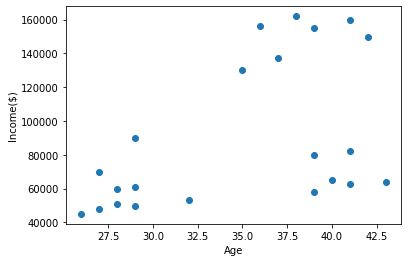

In [79]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [80]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 3, 3, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3],
      dtype=int32)

In [81]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,3
3,Ismail,28,60000,3
4,Kory,42,150000,2


In [82]:
km.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.29090909e+01, 5.61363636e+04]])

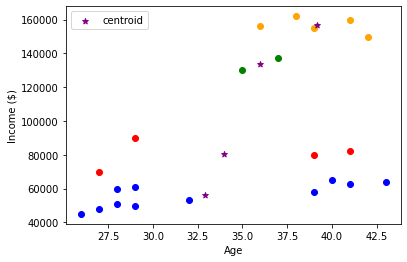

In [83]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]


plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='ORANGE')
plt.scatter(df4.Age,df4['Income($)'],color='blue')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [84]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [85]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,3
3,Ismail,0.117647,0.128205,3
4,Kory,0.941176,0.897436,2


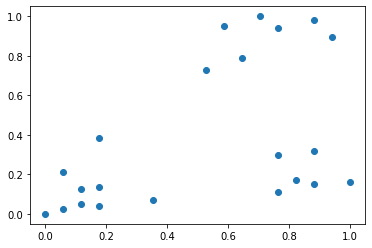

In [86]:
plt.scatter(df.Age,df['Income($)'])

In [87]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [88]:
df['cluster']=y_predicted
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [89]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

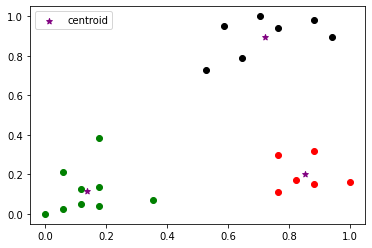

In [90]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

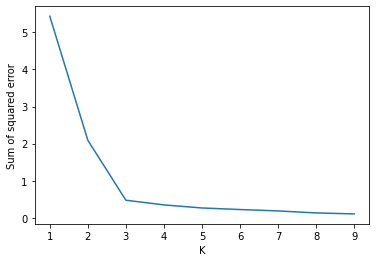

In [91]:
#elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)   #Inertia is the sum of squared distance of samples to their closest cluster center. 
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

##Hierarchial

In [92]:
from scipy.cluster import hierarchy
x = hierarchy.linkage(df[['Age','Income($)']],method='ward')

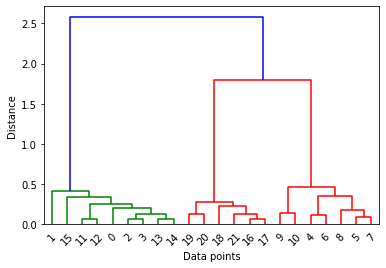

In [93]:
den = hierarchy.dendrogram(x)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [94]:
k=3
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=k)
pred = model.fit_predict(df[['Age','Income($)']])

In [95]:
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

#DBSCAN

In [111]:
#DBSCAN Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
data.shape

(200, 2)

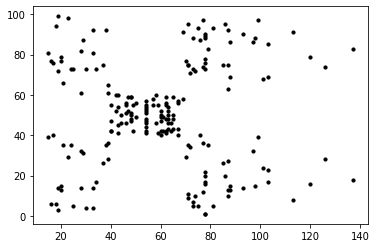

In [113]:
# visualizing the dataset
plt.scatter(data[:, 0], data[:, 1], s = 10, c = 'black')

In [114]:
# Fitting DBSCAN to the dataset and predict the Cluster label
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5.5, min_samples=4)
labels = dbscan.fit_predict(data) 
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [ ]:
#Clusters Labels. Note Cluster = -1 shows Noise point

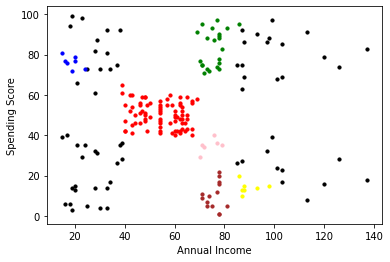

In [115]:
# Visualising the clusters
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], s = 10, c = 'black')# -1,0],0 indicate 1st column
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 10, c = 'red')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 10, c = 'green')
plt.scatter(data[labels == 3, 0], data[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(data[labels == 4, 0], data[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(data[labels == 5, 0], data[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(data[labels == 6, 0], data[labels == 6, 1], s = 10, c = 'silver')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
